# Preprocessing and Feature Engineering 

In order for machine learning algorithms to work properly they require their input data to be formatted in certain ways. The preprocessing phase handles these formatting requirements through a number of different techniques such as binarization, mean removal, scaling, normalization, and label encoding. Similarly, feature engineering is about taking any present information and turning it into a numerically illustrative feature matrix. 

## Binarization

Numerical values are transformed into Boolean values represented by zeros and ones.

In [209]:
import numpy as np
from sklearn import preprocessing

inputData = np.random.rand(3, 2)
print(inputData)

[[ 0.26516553  0.04466798]
 [ 0.03344112  0.07077217]
 [ 0.79311455  0.56114724]]


In [210]:
# Binarize data with values over .5 being 1 and those below 0
binData = np.where(inputData > .5, 1, 0)
print("Binarized Data:\n", binData)

# Alternative
# inputData = inputData.reshape(-1, 1)
# data_binarized = preprocessing.Binarizer(threshold=.5).transform(inputData) 
# print("\nBinarized Data:\n", data_binarized)

Binarized Data:
 [[0 0]
 [0 0]
 [1 1]]


## Mean Removal

Removing the mean involves setting it to zero and having a standard deviation of ones. This helps reduce bias in the input data. 

In [211]:
# Mean and standard deviation before mean removal
print("Input Data:\n", inputData)
print("\nMean:", inputData.mean(axis=0))
print("Standard Deviation:", inputData.std(axis=0))

Input Data:
 [[ 0.26516553  0.04466798]
 [ 0.03344112  0.07077217]
 [ 0.79311455  0.56114724]]

Mean: [ 0.36390707  0.22552913]
Standard Deviation: [ 0.31789762  0.237557  ]


In [212]:
# Mean and standard deviation after mean removal
scaledData = preprocessing.scale(inputData)
print("Input Data:\n", scaledData)
print("\nMean:", scaledData.mean(axis=0))
print("Standard Deviation:", scaledData.std(axis=0))

Input Data:
 [[-0.31060797 -0.7613379 ]
 [-1.03953576 -0.6514519 ]
 [ 1.35014373  1.4127898 ]]

Mean: [  7.40148683e-17   7.40148683e-17]
Standard Deviation: [ 1.  1.]


## Scaling

As the name implies this technique helps to scale down the variance of the input data so as to avoid any artificially large or small inputs.

In [213]:
# Min max scaling with a feature range from 0 and 1
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(inputData)
print("Input Data:\n", inputData)
print("\nMin max scaled data:\n", data_scaled_minmax)

Input Data:
 [[ 0.26516553  0.04466798]
 [ 0.03344112  0.07077217]
 [ 0.79311455  0.56114724]]

Min max scaled data:
 [[ 0.30503161  0.        ]
 [ 0.          0.05054257]
 [ 1.          1.        ]]


## Normalization

This process regulates the values in the input data to common scale. L1 normalization, or Least Absolute Deviations, makes it so that the sum of absolute values in each row is equal to one. L2 normalization, or least squares, has a similar approach by evaluating that the sum of the squared row values is equal to one. L1 normalization tends to be more resistant to outliers.

In [214]:
L1NormalizedData = preprocessing.normalize(inputData, norm='l1')
L2NormalizedData = preprocessing.normalize(inputData, norm='l2')
print("L1 Normalized Data:\n", L1NormalizedData)
print("\nL2 Normalized Data:\n", L2NormalizedData)

L1 Normalized Data:
 [[ 0.85583231  0.14416769]
 [ 0.32089113  0.67910887]
 [ 0.58564345  0.41435655]]

L2 Normalized Data:
 [[ 0.98610675  0.16611283]
 [ 0.42722492  0.90414538]
 [ 0.81633616  0.57757707]]


## Label Encoding

Labels are often times an attribute of data sets, and sometimes these labels are in a non-numeric format. To prepare the data to be used in machine learning functions it is necessary to covert word labels into numbers though the use of a label encoder.

In [215]:
# Sample input labels 
inputLabels = ['NVDA', 'AAPL', 'AMD', 'MSFT'] 

# Create a label encoder and fit the labels 
encoder = preprocessing.LabelEncoder() 
encoder.fit(inputLabels) 

# Print the mapping  
print("\nLabel Mapping:") 
for i, item in enumerate(encoder.classes_): 
    print(item, '-->', i) 


Label Mapping:
AAPL --> 0
AMD --> 1
MSFT --> 2
NVDA --> 3


In [216]:
# Encode a set of labels using the encoder 
testLabels = ['AMD', 'NVDA', 'AAPL', 'MSFT'] 
encodedValues = encoder.transform(testLabels) 
print("\nTest Labels =", testLabels) 
print("Encoded Values =", list(encodedValues)) 


Test Labels = ['AMD', 'NVDA', 'AAPL', 'MSFT']
Encoded Values = [1, 3, 0, 2]


## Imputation of Missing Data

When there is missing data in an array a common approach is to replace the missing value with something appropriate. This approach is referred to as imputation of missing values, and there are a variety of techniques that can be used to accomplish this. Basic imputation involves replacing the missing value with a mean, median, or most frequent value strategy.

In [217]:
from numpy import nan
from sklearn.preprocessing import Imputer

incompleteData = np.array([[ nan, 1, 5 ],
                           [ 9, 7, 3 ],
                           [ 1, 5, nan ],
                           [ 4, 5, 6 ],
                           [ 8, nan, 1 ]])

imp = Imputer(strategy='mean')
fixedData = imp.fit_transform(incompleteData)
print(fixedData)

[[ 5.5   1.    5.  ]
 [ 9.    7.    3.  ]
 [ 1.    5.    3.75]
 [ 4.    5.    6.  ]
 [ 8.    4.5   1.  ]]


## Transforming Inputs Through Derived Features

Sometimes the input data just isn’t enough to be described well by certain modelling methods. A way to get around this is by deriving and adding additional features to the data in order to improve model flexibility. Model improvement can therefore be done by transforming the inputs instead of changing the model itself. 

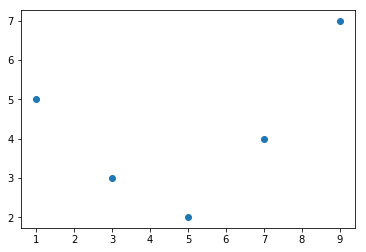

In [218]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1, 3, 5, 7, 9])
y = np.array([5, 3, 2, 4, 7])
plt.scatter(x, y);

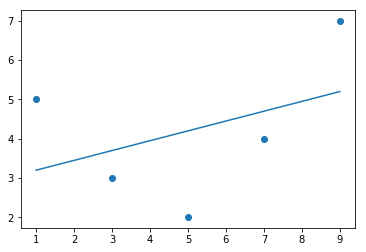

In [219]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [220]:
polynomial = PolynomialFeatures(degree=3, include_bias=False)
additionalFeaturesData = polynomial.fit_transform(X)

# The feature matrix has the first column representing the original x values, 
# the second column representing x squared, and the third column representing x cubed.
print(additionalFeaturesData)

[[   1.    1.    1.]
 [   3.    9.   27.]
 [   5.   25.  125.]
 [   7.   49.  343.]
 [   9.   81.  729.]]


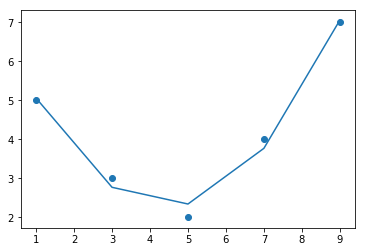

In [221]:
model = LinearRegression().fit(additionalFeaturesData, y)
yfit = model.predict(additionalFeaturesData)
plt.scatter(x, y)
plt.plot(x, yfit);

## One-Hot Encoding of Categorical Features

A more useful technique to altering non-numeric, or categorical, data into a numbered format is by using one-hot encoding. This approach creates extra columns in the data that represent the presence or absence of categorical features through the labels 0 or 1. Encoding like this can increase a data set dramatically if it contained a lot of varied categorical features. 

In [222]:
data = [{'price': 100, 'quantity ': 1, 'model': 'ZX42L'},
        {'price': 50, 'quantity ': 3, 'model': 'Y7S3'},
        {'price': 75, 'quantity ': 2, 'model': 'SCR77'},
        {'price': 23, 'quantity ': 4, 'model': 'LCM28R'},
        {'price': 70, 'quantity ': 2, 'model': 'SCR77'},]

In [223]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

# The 'model' column is expanded into four separate columns based on the existing four label types, 
# and a 1 is present on the row that is associated with one of those labels. 
vec.fit_transform(data)

array([[  0,   0,   0,   1, 100,   1],
       [  0,   0,   1,   0,  50,   3],
       [  0,   1,   0,   0,  75,   2],
       [  1,   0,   0,   0,  23,   4],
       [  0,   1,   0,   0,  70,   2]], dtype=int32)

In [224]:
# Display feature (column) names
vec.get_feature_names()

['model=LCM28R',
 'model=SCR77',
 'model=Y7S3',
 'model=ZX42L',
 'price',
 'quantity ']

## Encoding Text Features

It is also possible to encode text data into numerical values by word counts with Scikit-Learn’s CountVectorizer. The occurrences of each word in each piece of text is counted and organized in a table. 

In [225]:
data = ['What is your itinerary',
        'To meet my maker',
        'And what do you want to say to your maker',
        'The coward dies a thousand deaths',
        'The valiant taste of death but once']

In [226]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(data)

# Convert sparse matrix to a DataFrame with labeled columns
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,and,but,coward,death,deaths,dies,do,is,itinerary,maker,...,say,taste,the,thousand,to,valiant,want,what,you,your
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,2,0,1,1,1,1
3,0,0,1,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


To avoid putting too much weight on words that appear very frequently the term frequency–inverse document frequency (TF–IDF) technique can be used. It weights the word counts by a measure of how often they appear in the documents. 

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(data)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,and,but,coward,death,deaths,dies,do,is,itinerary,maker,...,say,taste,the,thousand,to,valiant,want,what,you,your
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550329,0.550329,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444002,0.000000,0.444002
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444002,...,0.000000,0.000000,0.000000,0.000000,0.444002,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.323484,0.000000,0.000000,0.000000,0.000000,0.000000,0.323484,0.000000,0.000000,0.260985,...,0.323484,0.000000,0.000000,0.000000,0.521969,0.000000,0.323484,0.260985,0.323484,0.260985
3,0.000000,0.000000,0.463693,0.000000,0.463693,0.463693,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.374105,0.463693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.387757,0.000000,0.387757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.387757,0.312840,0.000000,0.000000,0.387757,0.000000,0.000000,0.000000,0.000000


## Feature Pipelines

For the purposes of stringing together multiple steps Scikit-Learn provides a pipeline object that can be used to streamline a processing pipeline.

In [228]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'), # Impute missing values using the mean
                      PolynomialFeatures(degree=2), # Transform features to quadratic                     
                      LinearRegression()) # Fit a linear regression

# Predict results by applying the model to the training data
model.fit(incompleteData, y)
print('Actual:', y)
print('Predicted:', model.predict(incompleteData))

Actual: [5 3 2 4 7]
Predicted: [ 5.  3.  2.  4.  7.]
